Code is supplied by Mu from the University of Northampton, All code will be commented to demonstrate my understanding of each process, some code has been altered or changed in order to suit the deep learning model i have developed with the report.

In [ ]:
import os, shutil

#Store folder path that contain testing, validating, and training fruits (13 fruits in total (13 Labels))

testing = 'fruitdataset/testing'
training = 'fruitdataset/training'
validating = 'fruitdataset/validating'

In [ ]:
#Imports the keras framework
from keras import layers
from keras import models
from keras.models import Sequential
from google.colab import files

#unzip the fruits folder
!unzip -q fruitdataset.zip

#CNN Neural Network Layers
dataModel = Sequential()
dataModel.add(layers.Conv2D(16, (7, 7), activation='relu', input_shape=(100,100,3), padding='valid'))
dataModel.add(layers.MaxPooling2D(2,2))
dataModel.add(layers.Conv2D(32, (7,7), activation='relu'))
dataModel.add(layers.MaxPooling2D(2,2))
dataModel.add(layers.Conv2D(64, (7,7), activation='relu'))
dataModel.add(layers.MaxPooling2D(2,2))
dataModel.add(layers.Flatten())
dataModel.add(layers.Dense(64, activation='relu'))  
dataModel.add(layers.Dense(13, activation='softmax'))                       

#Display the Layers, Output Shape and Parameters, important that the output shape for the final(output layer) is the same number as
#there is labels (13)
dataModel.summary()

replace fruitdataset/testing/Avocado/48_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        2368      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 41, 32)        25120     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        100416    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_______________________________

In [ ]:
from keras import optimizers

#Add the optimizer, loss function for the neural network when training/validating to update weights and learning process
dataModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Training Images contains data augmentation parameters to further enchance the number of different images of fruits
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   vertical_flip=True,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   interpolation_order=1
                                   )

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  vertical_flip=True,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  interpolation_order=1)

#Get training images from directory using data augmentation, specifies the size of the input images, numbers of images per batch and the
#class mode of catergorical as the deep learning model aims to predict from a multiude of different fruit
train_generator = train_datagen.flow_from_directory(
        training,
        target_size=(100, 100),
        batch_size=100,
        class_mode='categorical',
        shuffle=True)

#Gets validation images from path variable, specifies same size of neural network input shape (no data augmentation)
validation_generator = test_datagen.flow_from_directory(
        validating,
        target_size=(100, 100),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)



Found 2600 images belonging to 13 classes.
Found 780 images belonging to 13 classes.


In [ ]:
#displays the batch shape that should contain 10, img dimensions (100, 100), and number of layers (3 for rgb)
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

     


data batch shape: (100, 100, 100, 3)
labels batch shape: (100, 13)


In [ ]:
#Trains the deep learning model, specifies steps and epochs carefully to allow the model to train through all images per epoch
history = dataModel.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=6)

Epoch 1/20
20/20 [==============================] - 6s 281ms/step - loss: 2.1429 - accuracy: 0.2525 - val_loss: 1.3902 - val_accuracy: 0.4000
Epoch 2/20
20/20 [==============================] - 5s 257ms/step - loss: 0.8599 - accuracy: 0.6830 - val_loss: 0.2756 - val_accuracy: 0.8583
Epoch 3/20
20/20 [==============================] - 5s 262ms/step - loss: 0.3657 - accuracy: 0.8640 - val_loss: 0.1037 - val_accuracy: 0.9583
Epoch 4/20
20/20 [==============================] - 5s 256ms/step - loss: 0.2051 - accuracy: 0.9300 - val_loss: 0.1304 - val_accuracy: 0.9750
Epoch 5/20
20/20 [==============================] - 5s 252ms/step - loss: 0.1261 - accuracy: 0.9540 - val_loss: 0.1074 - val_accuracy: 0.9417
Epoch 6/20
20/20 [==============================] - 5s 248ms/step - loss: 0.0951 - accuracy: 0.9645 - val_loss: 0.0591 - val_accuracy: 0.9917
Epoch 7/20
20/20 [==============================] - 5s 261ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0152 - val_accuracy: 0.9917
Epoch 

In [ ]:
#Saves the deep learning model to be used for testing
dataModel.save('fruitmodel.h5')

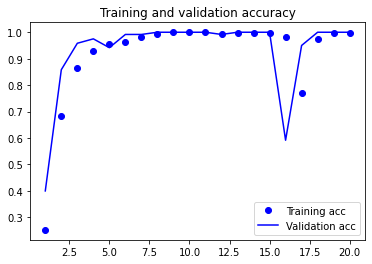

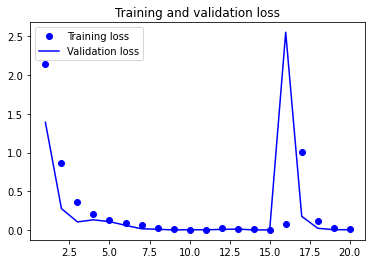

In [ ]:
import matplotlib.pyplot as plt

#Generate a graph that represents the training and validation accuracy per epoch as well as training and validation loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

#reload the saved model from training and summarises
model = load_model('fruitmodel.h5')
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        2368      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 41, 32)        25120     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        100416    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

This fruit is a Pear


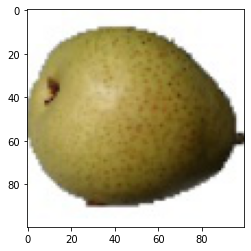

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

#Create numpy array of all fruit labels, this is to be used to print the correct prediction
fruitlabel = np.array([
      'Avocado',
      'Banana',
      'Blueberry',
      'Kiwi',
      'Lemon',
      'Limes',
      'Mango',
      'Peach',
      'Pear',
      'Pineapple',
      'Raspberry',
      'Strawberry',
      'Watermelon'                 
])

#Load a single image from testing folder, show the image and convert image into an array in order for the model to predict the image
#Change the path to load any image from the test folder
testfruit = image.load_img('fruitdataset/testing/Pear/r_323_100.jpg')
plt.imshow(testfruit)
testfruit = image.img_to_array(testfruit)
testfruit = np.expand_dims(testfruit,axis=0)
# This returns an array of 13 values representing 0 and 1, 1 being the predicted fruit
pred = model.predict(testfruit)

#Use numpy function to find largest value of array and return its index, this index will be used to load the correct label array index
res = np.where(pred[0] == np.amax(pred[0]))
print('This fruit is a ' + fruitlabel[res[0][0]])




